In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
TF_DETERMINISTIC_OPS=1

# Set random seeds for reproducibility
random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)

In [2]:
!git clone https://github.com/Rajlaxmi-giri/DL_Assignment.git

Cloning into 'DL_Assignment'...
remote: Enumerating objects: 25009, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25009 (delta 0), reused 3 (delta 0), pack-reused 25005 (from 1)
Receiving objects: 100% (25009/25009), 561.08 MiB | 17.38 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (25005/25005), done.


In [3]:
df = pd.read_csv("/content/DL_Assignment/CatVsDog_classification/Dataset/cat_dog.csv")
df

,image,labels
0,dog.11289.jpg,1
1,cat.10836.jpg,0
2,cat.7970.jpg,0
3,cat.2212.jpg,0
4,dog.2653.jpg,1
...,...,...
24995,dog.12201.jpg,1
24996,dog.2893.jpg,1
24997,cat.12267.jpg,0
24998,dog.4380.jpg,1


In [4]:
df.dtypes

,0
image,object
labels,int64


In [5]:
df['image'][0]

'dog.11289.jpg'

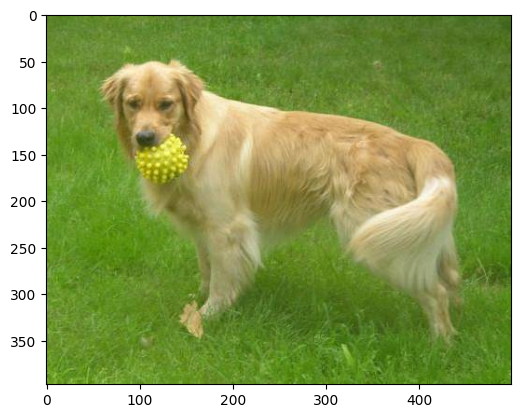

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/content/DL_Assignment/CatVsDog_classification/Dataset/cat_dog/dog.66.jpg"

image = mpimg.imread(image_path)

plt.imshow(image)
plt.show()

**Check image label**
- label 1 (Dog), label 0 (cat)

In [7]:
image_filename = "dog.66.jpg"

image_row = df[df['image'] == image_filename]

label = image_row['labels'].iloc[0]

print("Label for", image_filename, ":", label)

Label for dog.66.jpg : 1


**Count unique values**

In [8]:
unique_counts = df['labels'].value_counts()

unique_counts

,count
labels,
1,12500
0,12500


**check null values**

In [9]:
nullvalues = df.isnull().sum()
nullvalues

,0
image,0
labels,0


In [11]:
import shutil
import os
dir_path = '/content/DL_Assignment/CatVsDog_classification/Dataset/cat_dog'

cat_images = '/content/DL_Assignment/CatVsDog_classification/Dataset/cat_dog/cat'
dog_images = '/content/DL_Assignment/CatVsDog_classification/Dataset/cat_dog/dog'

os.makedirs(cat_images, exist_ok=True)
os.makedirs(dog_images, exist_ok=True)

for filename in os.listdir(dir_path):
    if os.path.isfile(os.path.join(dir_path, filename)) and filename.startswith("cat"):
        shutil.move(os.path.join(dir_path, filename), os.path.join(cat_images, filename))
    elif os.path.isfile(os.path.join(dir_path, filename)) and filename.startswith("dog"):
        shutil.move(os.path.join(dir_path, filename), os.path.join(dog_images, filename))


In [15]:
#Normalize
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
#generators
train_generator = train_datagen.flow_from_directory(
        dir_path,
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        dir_path,
        batch_size=32,
        target_size=(256, 256),
        class_mode='binary',
        subset='validation')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [18]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential()

model.add(Conv2D(18,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 18)        │             504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 254, 254, 18)        │              72 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 18)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 32)        │           5,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 60, 60, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,318,753 (12.66 MB)

 Trainable params: 3,318,269 (12.66 MB)

 Non-trainable params: 484 (1.89 KB)

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [21]:
history = model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 401s 613ms/step - accuracy: 0.5774 - loss: 1.0246 - val_accuracy: 0.5600 - val_loss: 0.7969
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 383s 609ms/step - accuracy: 0.7114 - loss: 0.5620 - val_accuracy: 0.7708 - val_loss: 0.4720
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 389s 618ms/step - accuracy: 0.7778 - loss: 0.4754 - val_accuracy: 0.7476 - val_loss: 0.5205
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 380s 603ms/step - accuracy: 0.8160 - loss: 0.4053 - val_accuracy: 0.8320 - val_loss: 0.3884
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 381s 602ms/step - accuracy: 0.8419 - loss: 0.3571 - val_accuracy: 0.8266 - val_loss: 0.3776
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 375s 595ms/step - accuracy: 0.8703 - loss: 0.3041 - val_accuracy: 0.8666 - val_loss: 0.3141
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 376s 597ms/step - accuracy: 0.8911 - loss: 0.2641 - val_accuracy: 0.8950 - val_loss: 0.2499
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 387s 613ms/step - accuracy: 0.9031 -

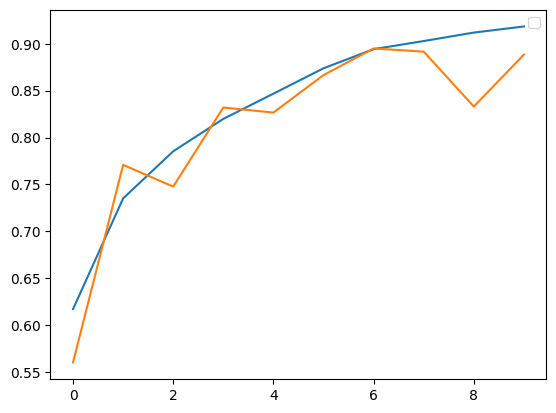

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.show()

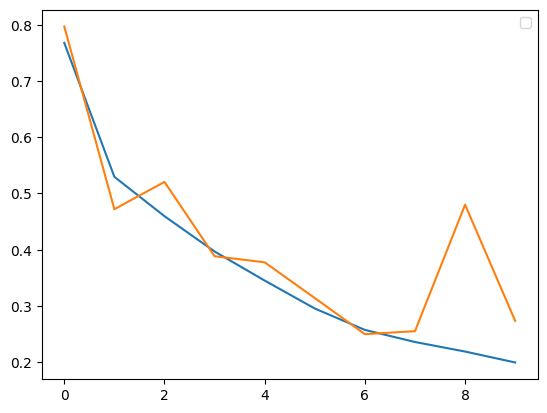

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

In [24]:
model.save_weights('model_weights.weights.h5')

In [25]:
import cv2

In [67]:
image_test=cv2.imread('/content/cat_img.jpg')
image_test1=cv2.imread('/content/dog_img.jpg')

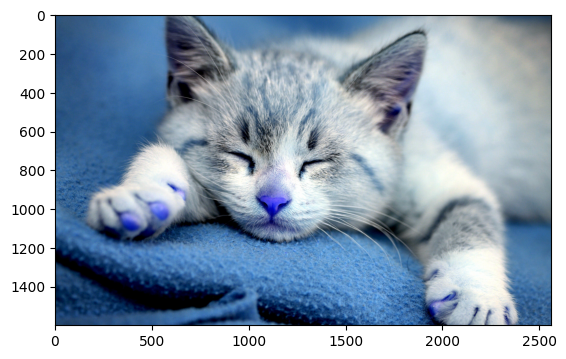

In [68]:
plt.imshow(image_test)

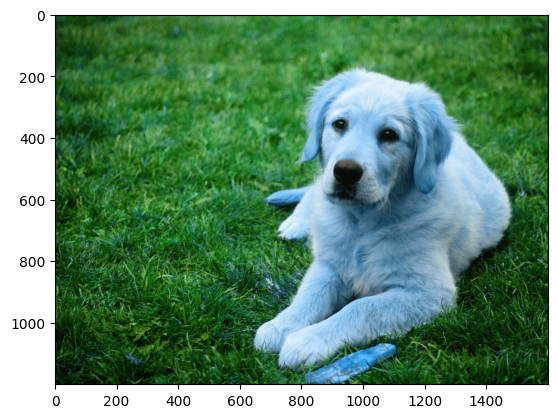

In [69]:
plt.imshow(image_test1)

In [70]:
print(image_test.shape)
print(image_test1.shape)

(1600, 2560, 3)
(1200, 1600, 3)


In [71]:
image_test=cv2.resize(image_test,(256,256))
image_test1=cv2.resize(image_test1,(256,256))

In [72]:
image_test=image_test.reshape((1,256,256,3))
image_test1=image_test1.reshape((1,256,256,3))

In [73]:
print(model.predict(image_test))  # cat image
print(model.predict(image_test1)) # dog image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[[0.]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[[1.]]
